In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import importlib
# Set Jupyter theme
jtplot.style(theme='grade3', context='paper', ticks=True, grid=False)

# Configure inline figure format
%config InlineBackend.figure_format = 'retina'

# Update matplotlib font settings

plt.rcParams.update({'font.size': 12,  # Adjust font size as needed
                     "mathtext.fontset": 'cm',
                     "text.usetex": False,
                     "axes.labelcolor":  "gray",
                     "axes.edgecolor":  "gray",
                     "axes.spines.left":   True,  # display axis spines
                     "axes.spines.bottom": True,
                     "axes.spines.top":    False,
                     "axes.spines.right":  False,
                     "xtick.color":       "gray",
                     "ytick.color":     "gray",
                     "xtick.major.size":       0,
                     "ytick.major.size":     0,
                     "xtick.major.pad":       5,
                     "ytick.major.pad":     5,
                     "legend.fancybox":      True,
                     "legend.labelcolor":  "gray",
                     })  # Set font family for math text

# If you are reloading modules, you may need to use importlib.reload()
# importlib.reload(module_name)

In [2]:
import src.markovchain
src.markovchain = importlib.reload(src.markovchain)
import src.mrp
src.mrp = importlib.reload(src.mrp)
import src.mdp
src.mdp = importlib.reload(src.mdp)
import src.tiny_mdps
src.tiny_mdps = importlib.reload(src.tiny_mdps)
mdps = []
for mdp_no in [3]:
    mdp = src.tiny_mdps.load_example(mdp_no)
    mdps.append(mdp)
%matplotlib inline

In [3]:
initial_policy_list = ["zeros", "boundary"]
initial_policy_labels_list = [ r'\text{center}',  r'\text{boundary}']
T = 50
n_list = [1, 10, 50]
k_list = [1, 10, 50]
n_seeds = 1

In [4]:
from src import runner
# Reload the runner module if needed
runner = importlib.reload(runner)
# Initialize lists to store parameters, generators, and data
lookahead = []
for n in n_list:
    sweep_params = {
        "seed": np.arange(n_seeds),
        "num_iter": [T],
        "n": [n],
        "k": [0],
        "policy_improvement_type": ["PMD(+lookahead)"],
    }
    lookahead_n = runner.batch_run_alg(mdps, "initial_policy", initial_policy_list, "optimization", sweep_params)
    lookahead.append(lookahead_n)

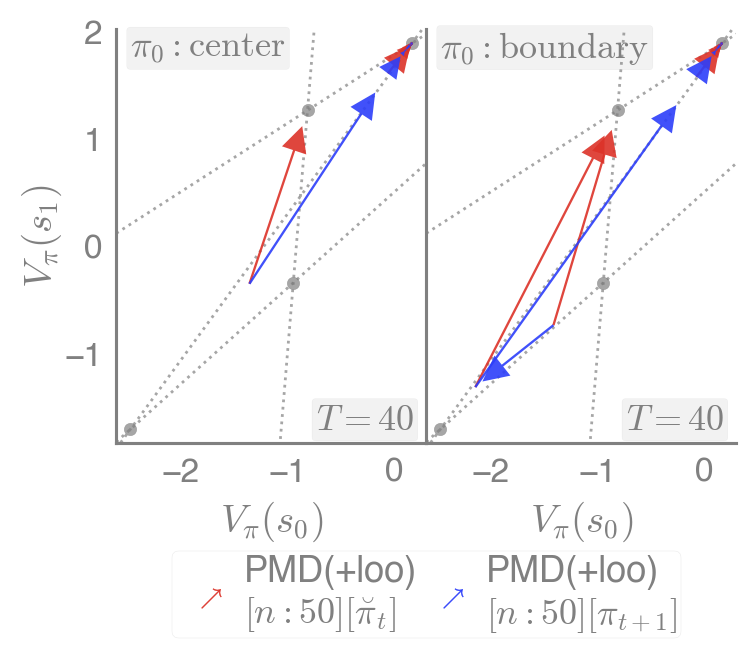

In [6]:
import src.plot_tiny_mdps
src.plot_tiny_mdps = importlib.reload(src.plot_tiny_mdps)
from src.plot_tiny_mdps import plot_vector_fields
import colormaps as cmaps

T_per_mdp = [ [3, 40, 50]]
newcmap1 = cmaps.WhiteGreen.shift(0.25).cut(0.25, "right").cut(0.5, "left")
newcmap2 = cmaps.cet_l_kbc_r.shift(0.25).cut(0.5, "right")
newcmap3 = cmaps.WhiteYellowOrangeRed.shift(0.25).cut(0.3, "right").cut(0.5, "left")
cmaps_n = [newcmap3, newcmap2]

for mdp_no, mdp in enumerate(mdps):
    if mdp_no == 0:
        labels = []
        data = []
        batch_param_kv_rows = []
        
        labels_inner = []
        data_inner = []
        batch_param_kv_rows_inner = []
        for i, initial_policy in enumerate(initial_policy_list):
            innerT = T_per_mdp[mdp_no][i]
            nn = 2
            n = 50
            labels_inner.append(f"PMD(+loo)\n$[n:{n}]$")
            data_inner.append(lookahead[nn][2][mdp_no][i])
            batch_param_kv_rows_inner.append(f"$\pi_0:{initial_policy_labels_list[i]}$")
        data.append(data_inner)
        labels.append(labels_inner)
        batch_param_kv_rows.append(batch_param_kv_rows_inner)


        plot_vector_fields(mdp, batch_param_kv_rows=batch_param_kv_rows,
                           data=data,
                           labels=labels,
                           T=innerT, legend_bbox=(0., -0.25),
                           alpha=0.9, ext=True, tp1=True,
                           savefig=True, text_pos=[4,20],
                           labelsize=14, textsize=13,
                           legendsize=13,
                           ticklabelsize=12,
                           arrowsize=11, arrowscale=1.1, s=200,
                           cmaps=cmaps_n,
                           figname=f"how__b__loo")